# Introduction to Statistical Learning - Chapter 2

## Exercise 9

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

This exercise involves the `Auto` data set studied in the lab.

In [2]:
auto = pd.read_csv('../datasets/Auto.csv')

Make sure that the missing values have been removed from the data

In [3]:
assert not auto.isnull().values.any()

(a) Which of the predictors are quantitative, and which are qualitative?

In [4]:
qualitative = set(['origin', 'name', 'cylinders'])
quantitative = set(auto.columns) - qualitative

print('{} qualitative columns {}'.format(len(qualitative), qualitative))
print('{} quantitative columns {}'.format(len(quantitative), quantitative))

3 qualitative columns {'origin', 'name', 'cylinders'}
6 quantitative columns {'displacement', 'mpg', 'year', 'horsepower', 'weight', 'acceleration'}


(b) What is the range of each quantitative predictor? 

In [5]:
auto[list(quantitative)].describe().loc[['min', 'max']]

,displacement,mpg,year,weight,acceleration
min,68.0,9.0,70.0,1613.0,8.0
max,455.0,46.6,82.0,5140.0,24.8


(c) What is the mean and standard deviation of each quantitative predictor?

In [6]:
auto[list(quantitative)].describe().loc[['mean','std']]

,displacement,mpg,year,weight,acceleration
mean,193.532746,23.515869,75.994962,2970.261965,15.555668
std,104.379583,7.825804,3.690005,847.904119,2.749995


(d) Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?

In [7]:
smaller = auto.drop(auto.index[10:86])
smaller[list(quantitative)].describe().loc[['min', 'max', 'mean', 'std']]

,displacement,mpg,year,weight,acceleration
min,68.000000,11.000000,70.000000,1649.000000,8.500000
max,455.000000,46.600000,82.000000,4997.000000,24.800000
mean,187.174455,24.444860,77.143302,2933.183801,15.709034
std,99.864568,7.899928,3.128202,809.638650,2.706441


(e) Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice. Create some plots highlighting the relationships among the predictors. 

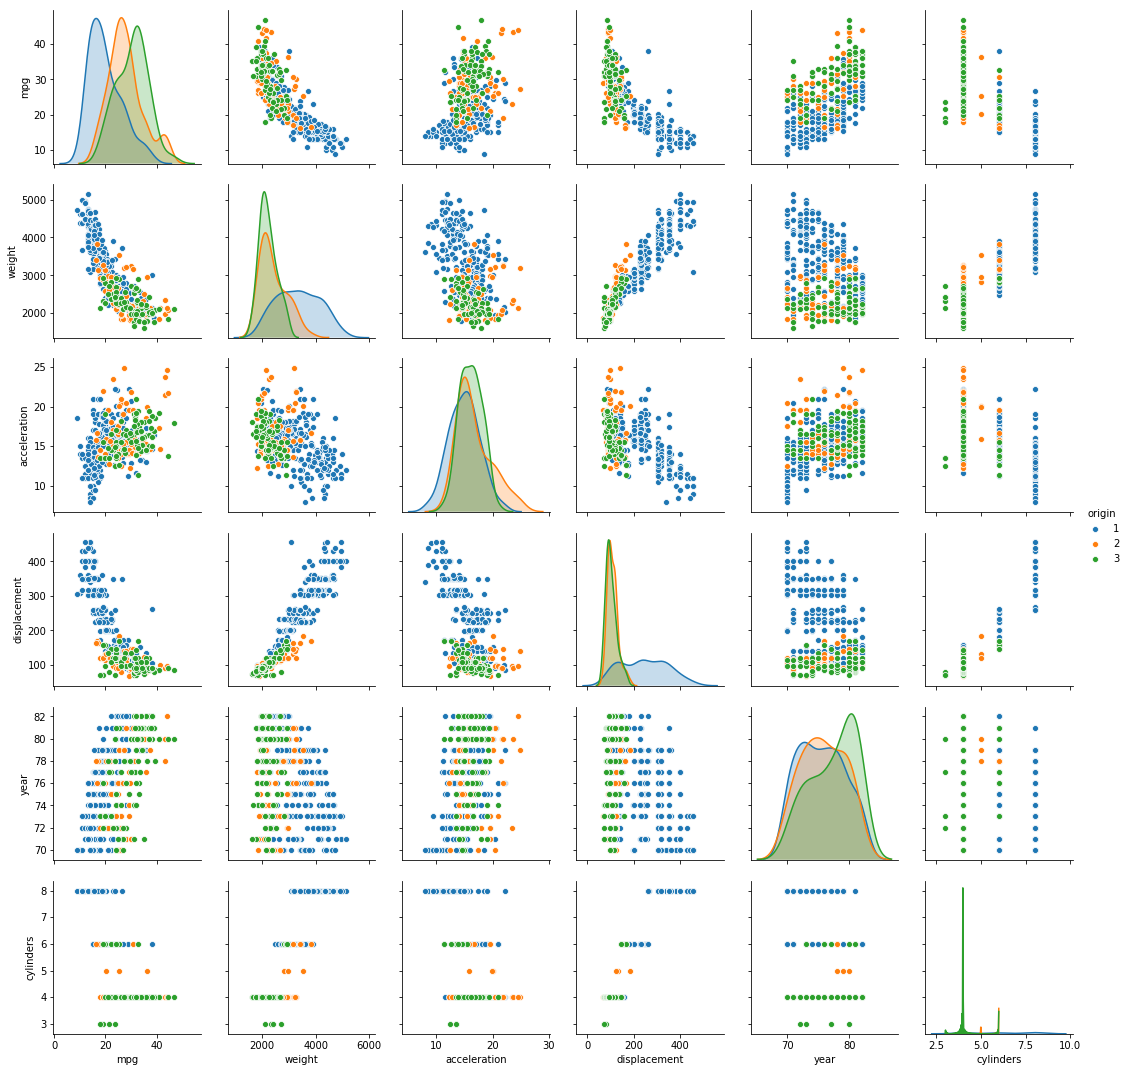

In [8]:
sns.pairplot(auto, vars=['mpg', 'weight', 'acceleration', 'displacement', 'year', 'cylinders'], hue='origin');

(f) Suppose that we wish to predict gas mileage (mpg) on the basis of the other variables. Do your plots suggest that any of the other variables might be useful in predicting mpg? Justify your answer.

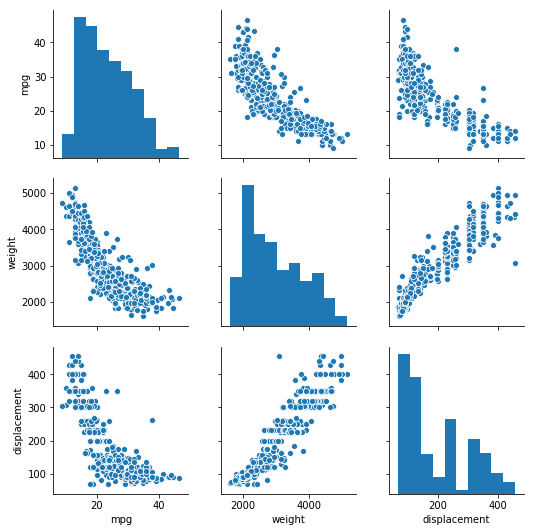

In [9]:
sns.pairplot(auto, vars=['mpg', 'weight', 'displacement']);

__weight__ and __displacement__ seem to be the best predictors for __mpg__, we can confirm this by running Pearsons correlation coefficient:

In [10]:
auto[['weight', 'displacement', 'mpg']].corr()

,weight,displacement,mpg
weight,1.000000,0.933104,-0.831739
displacement,0.933104,1.000000,-0.804443
mpg,-0.831739,-0.804443,1.000000
